#Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
# Simulando dados mensais de 3 anos para um laboratório - ver a saída.
np.random.seed(42)
dates = pd.date_range(start='2021-01-01', end='2024-07-01', freq='MS')
n = len(dates)

In [5]:
print(df.head())  # Mostra as primeiras 5 linhas do DataFrame


               Demanda
Data                  
2021-01-01  509.934283
2021-02-01  514.234714
2021-03-01  542.934533
2021-04-01  566.460597
2021-05-01  529.297695


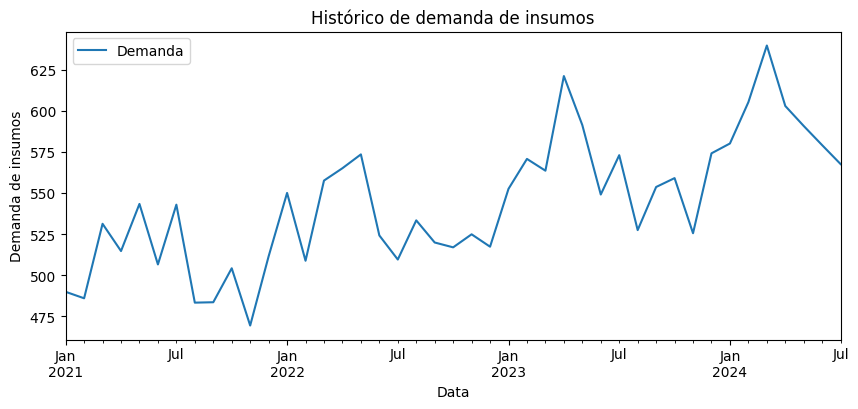

In [8]:
# Demanda simulada com tendência e sazonalidade
demanda = 500 + (np.arange(n) * 2) + (30 * np.sin(2 * np.pi * np.arange(n)/12)) + np.random.normal(0, 20, n)

df = pd.DataFrame({'Data': dates, 'Demanda': demanda})
df.set_index('Data', inplace=True)
df.plot(title='Histórico de demanda de insumos', figsize=(10,4))
plt.xlabel("Data")
plt.ylabel("Demanda de insumos")
plt.show()


c:\Users\rober\Desktop\PROJETO LOGÍSTICA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\rober\Desktop\PROJETO LOGÍSTICA\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\rober\Desktop\PROJETO LOGÍSTICA\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


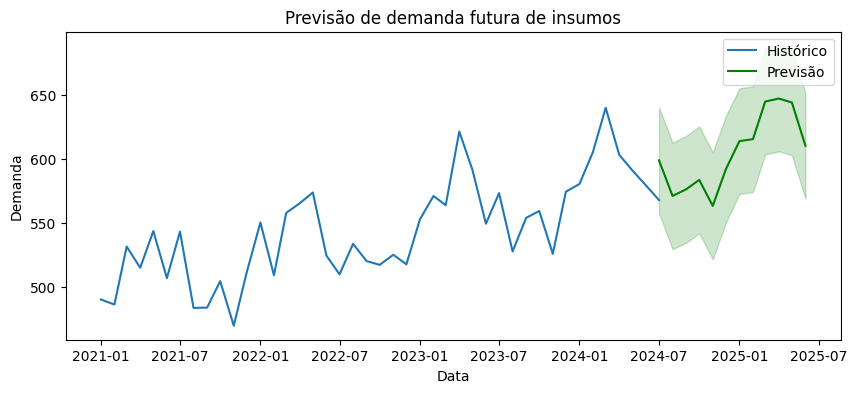

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Treinamento: dados até junho/2024
train = df.iloc[:-1]
model = SARIMAX(train['Demanda'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Previsão para 6 meses futuros
forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualize
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Demanda'], label='Histórico')
plt.plot(predicted_mean.index, predicted_mean, label='Previsão', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2)
plt.title("Previsão de demanda futura de insumos")
plt.xlabel("Data")
plt.ylabel("Demanda")
plt.legend()
plt.show()


In [12]:
tabela_previsao = pd.DataFrame({
    'Previsão Média': predicted_mean,
    'Intervalo Inferior': conf_int.iloc[:, 0],
    'Intervalo Superior': conf_int.iloc[:, 1]
})

# Mostrar a tabela formatada
print(tabela_previsao)

            Previsão Média  Intervalo Inferior  Intervalo Superior
2024-07-01      598.768355          557.314984          640.221725
2024-08-01      570.920105          529.213460          612.626751
2024-09-01      576.104601          534.284362          617.924840
2024-10-01      583.479121          541.678286          625.279957
2024-11-01      563.132304          521.310685          604.953923
2024-12-01      591.859341          550.167550          633.551133
2025-01-01      613.775651          572.458385          655.092917
2025-02-01      615.372117          574.054733          656.689501
2025-03-01      644.757233          603.439779          686.074686
2025-04-01      647.115538          605.798000          688.433076
2025-05-01      644.036289          602.718682          685.353896
2025-06-01      610.197593          568.879850          651.515336


In [10]:
tabela_previsao.to_csv('previsao_insumos.csv', index=True)
